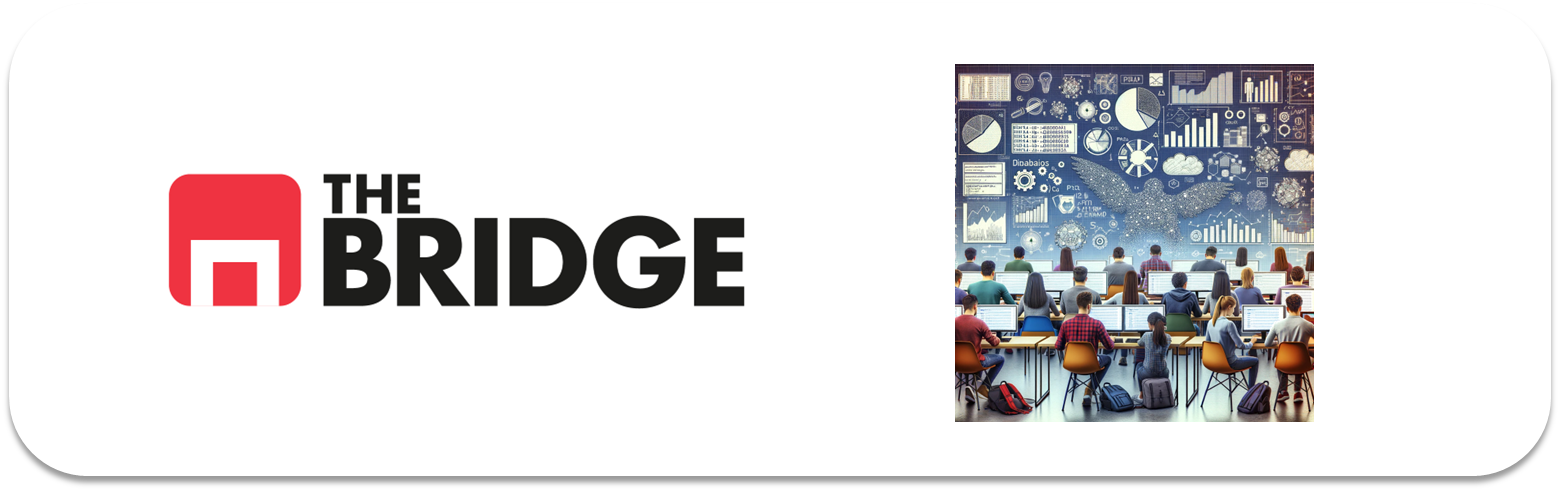

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data/titanic.csv')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



### Preparación Datos

In [23]:
df.rename(columns = {'survived': 'target'}, inplace=True)

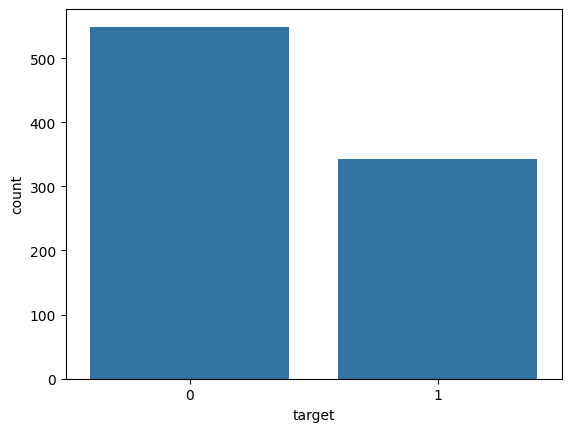

In [24]:
sns.countplot(data=df, x='target');

### Preparación datos: dividir el datasetm

In [25]:
from sklearn.model_selection import train_test_split 

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

### Mini-EDA: Matriz de correlaciones

Entiendo que para coger todas las VV posibles, puedo hacer One hot endocer para pasarlas a numéricas

In [26]:
df_eda = X_train.copy()
df_eda["target"] = y_train.copy()

   target  pclass   age  sibsp  parch     fare  adult_male  alone  sex_female  \
0       0       3  22.0      1      0   7.2500        True  False       False   
1       1       1  38.0      1      0  71.2833       False  False        True   
2       1       3  26.0      0      0   7.9250       False   True        True   
3       1       1  35.0      1      0  53.1000       False  False        True   
4       0       3  35.0      0      0   8.0500        True   True       False   

   sex_male  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
0      True  ...   False   False   False   False   False   
1     False  ...    True   False   False   False   False   
2     False  ...   False   False   False   False   False   
3     False  ...    True   False   False   False   False   
4      True  ...   False   False   False   False   False   

   embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  \
0                  False                   False                     True  

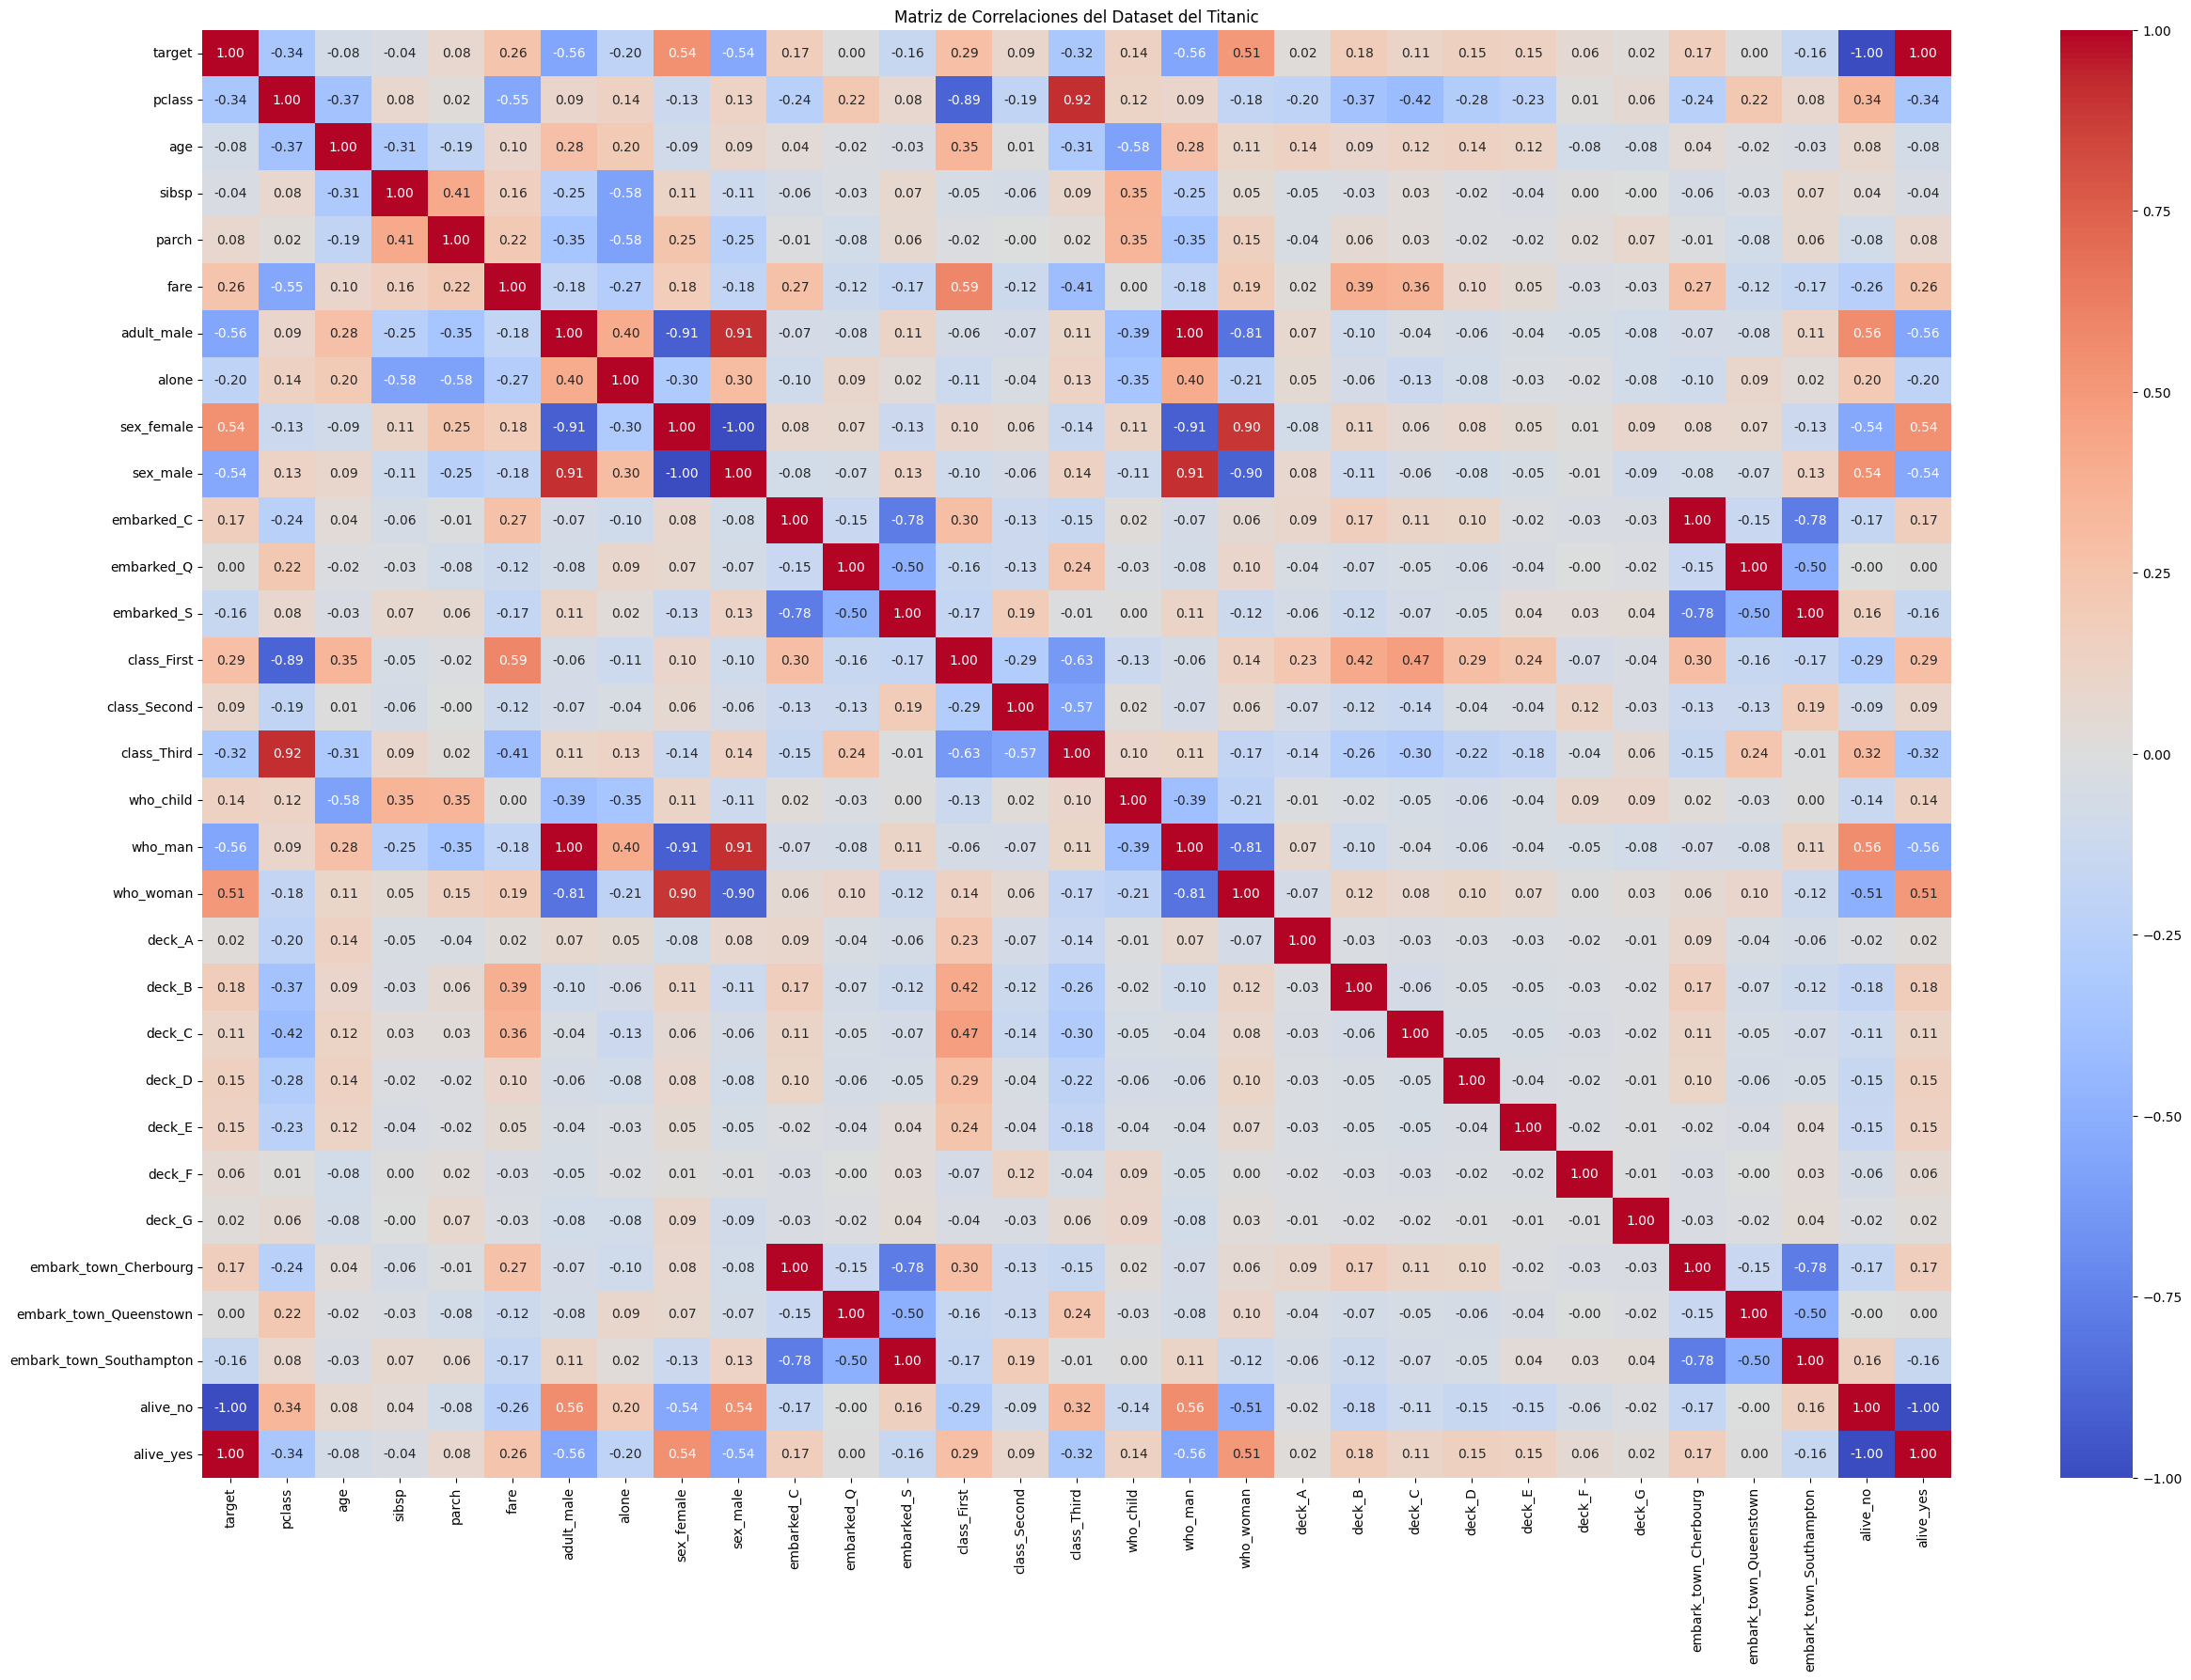

In [27]:
# Usar One-Hot Encoding para las variables categóricas
df_eda = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'])

# Ver las primeras filas del dataframe con las columnas nuevas
print(df_eda.head())

# Crear la matriz de correlaciones
correlation_matrix = df_eda.corr()

# Visualizar la matriz de correlaciones usando un heatmap de seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlaciones del Dataset del Titanic")
plt.show()

In [28]:
np.abs(df_eda.corr()['target']).sort_values(ascending=False)

alive_no                   1.000000
target                     1.000000
alive_yes                  1.000000
who_man                    0.557080
adult_male                 0.557080
sex_male                   0.543351
sex_female                 0.543351
who_woman                  0.506562
pclass                     0.338481
class_Third                0.322308
class_First                0.285904
fare                       0.257307
alone                      0.203367
deck_B                     0.175095
embark_town_Cherbourg      0.168240
embarked_C                 0.168240
embarked_S                 0.155660
embark_town_Southampton    0.155660
deck_D                     0.150716
deck_E                     0.145321
who_child                  0.136107
deck_C                     0.114652
class_Second               0.093349
parch                      0.081629
age                        0.077221
deck_F                     0.057935
sibsp                      0.035322
deck_A                     0

In [29]:
corr = np.abs(df_eda.corr()['target']).sort_values(ascending=False)

# Features con menos de 0.1 de correlación vs el target
bad_corr_feat = corr[corr < 0.05].index.values

# Filtramos las columnas buenas
df_eda.drop(columns=bad_corr_feat, inplace=True)

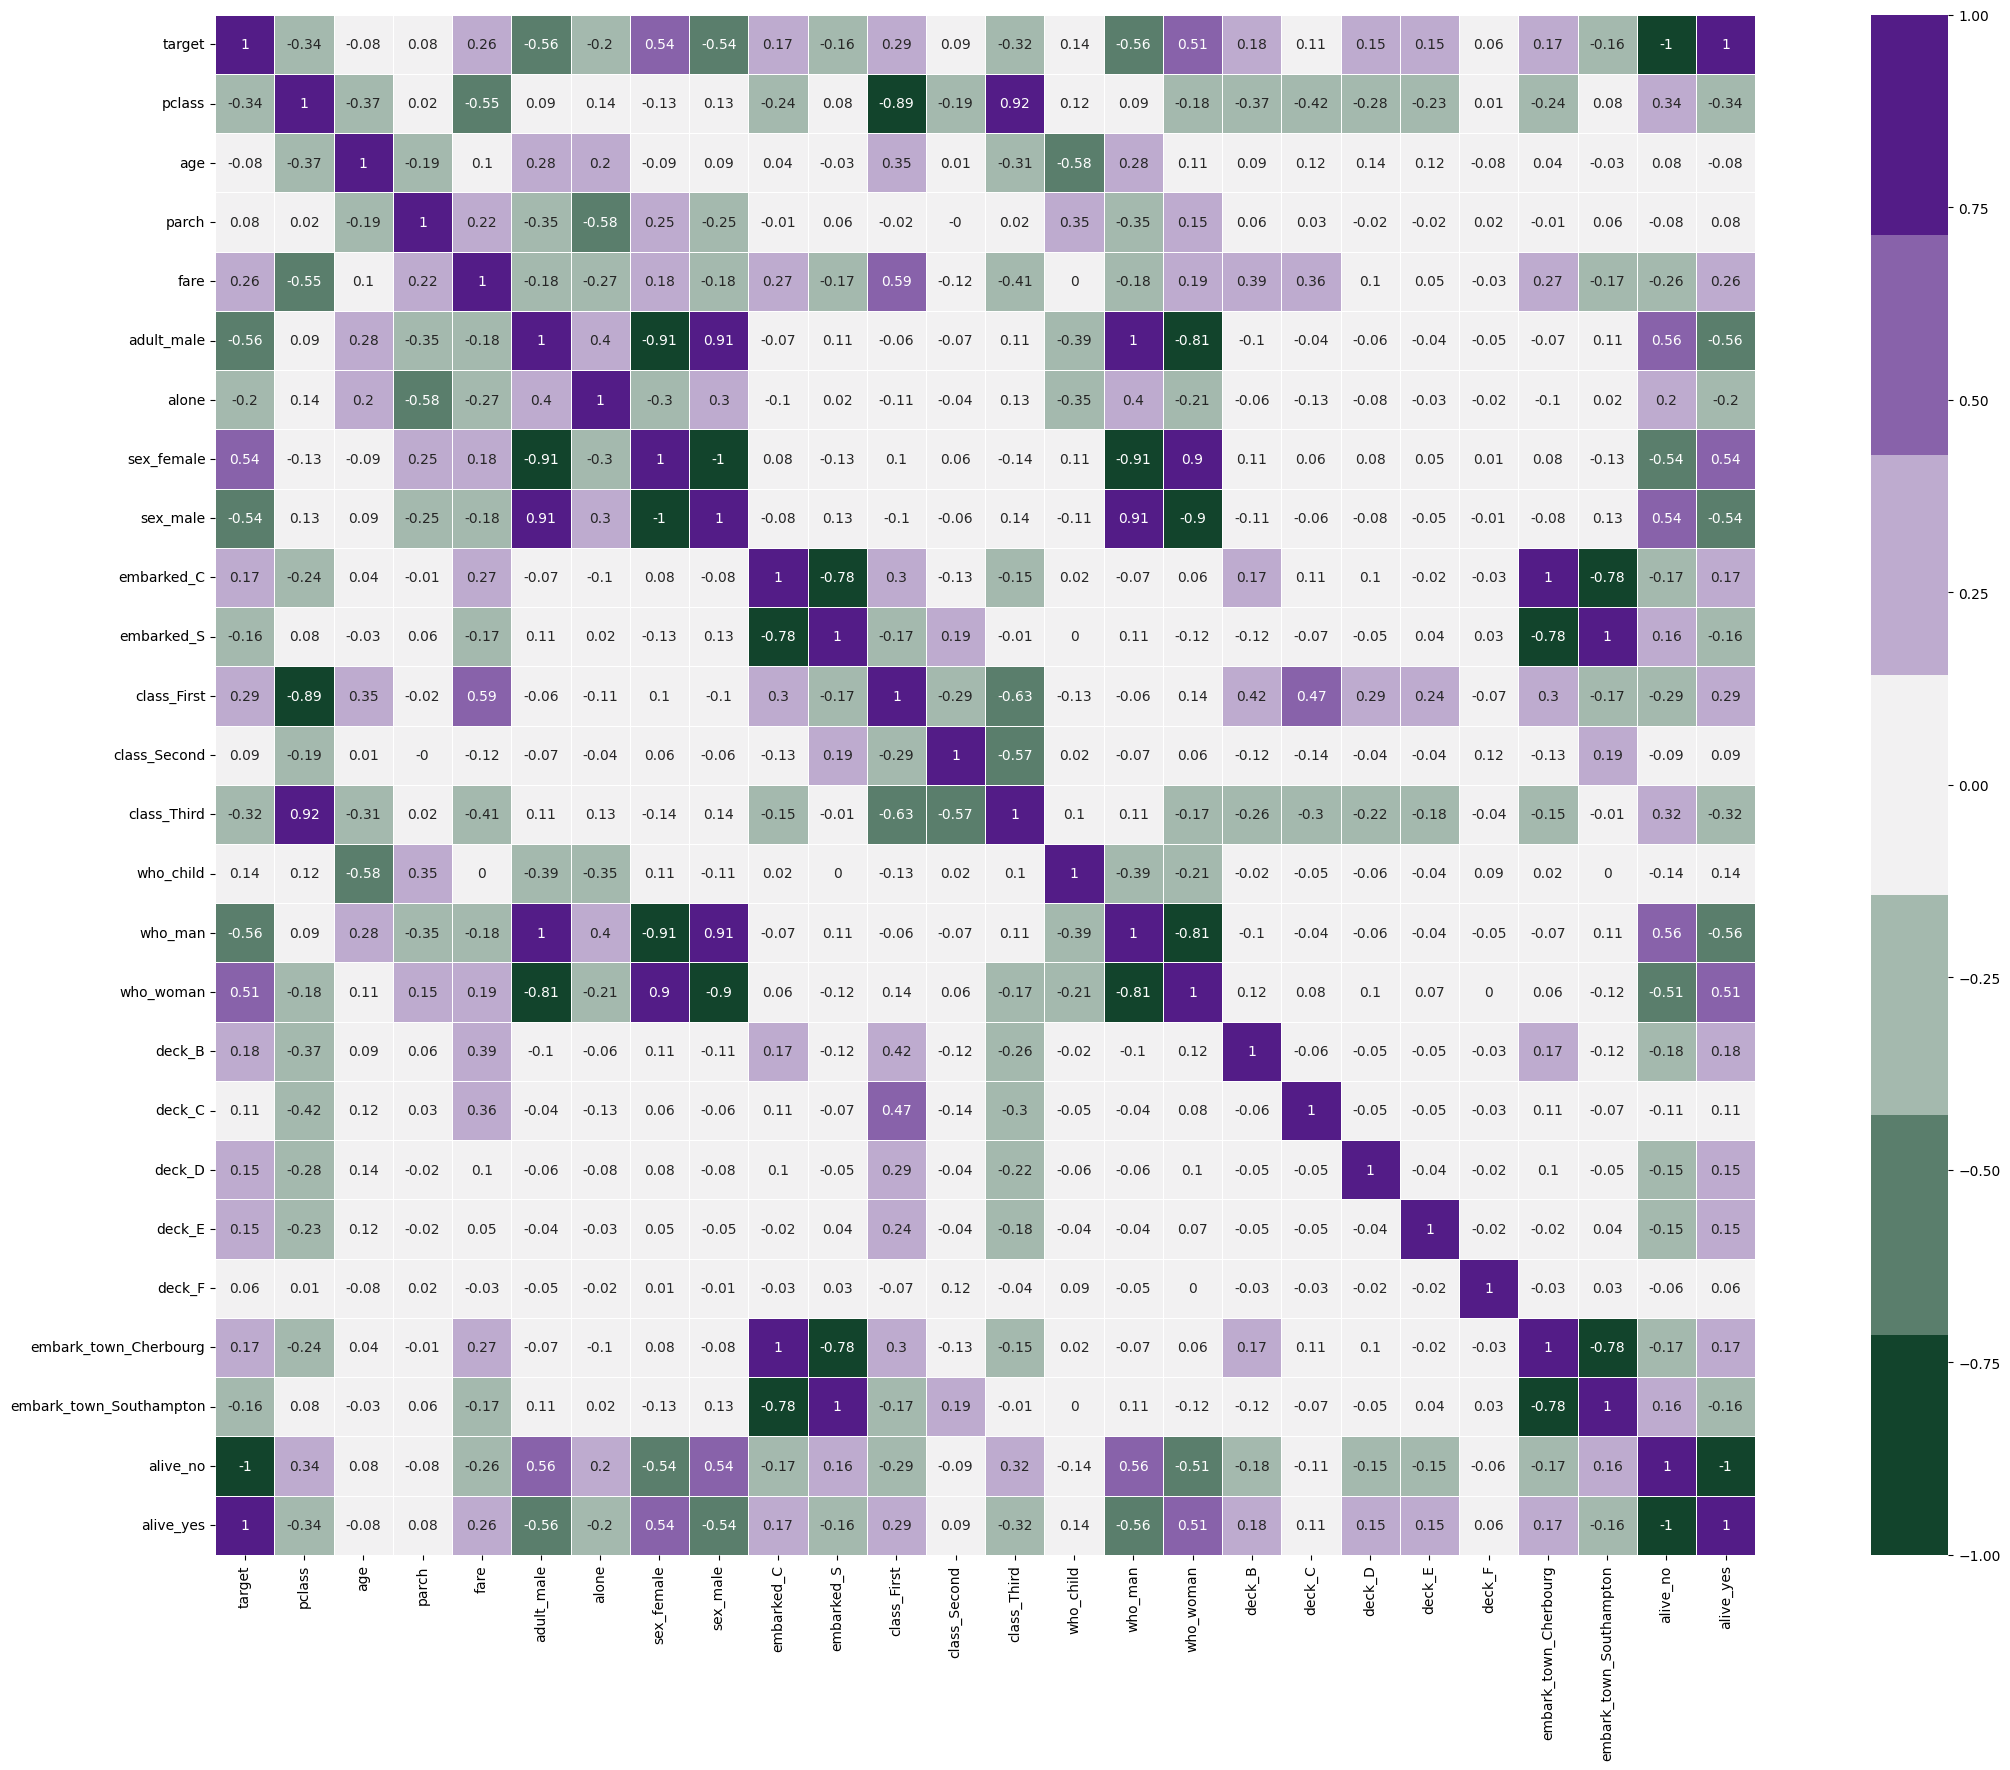

In [30]:
plt.figure(figsize=(30,20))
sns.heatmap(np.round(df_eda.corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

### Preparación de features

In [31]:
features_num = [col for col in df_eda.columns if "target" not in col]
X_train = X_train[features_num].copy()

# Aquí empieza todo el error. ¿Cuestión de transformar categóricas a numéricas?

KeyError: "['sex_female', 'sex_male', 'embarked_C', 'embarked_S', 'class_First', 'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'embark_town_Cherbourg', 'embark_town_Southampton', 'alive_no', 'alive_yes'] not in index"

In [35]:
print("Columnas en X_train:")
print(X_train.columns)


Columnas en X_train:
Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')


In [36]:
print("Columnas que intento seleccionar:")
print(features_num)


Columnas que intento seleccionar:
['pclass', 'age', 'parch', 'fare', 'adult_male', 'alone', 'sex_female', 'sex_male', 'embarked_C', 'embarked_S', 'class_First', 'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'embark_town_Cherbourg', 'embark_town_Southampton', 'alive_no', 'alive_yes']


In [37]:
# Ejemplo de selección de características
features_num = [col for col in df_eda.columns if "target" not in col]

# Verifica si todas las columnas están en X_train
missing_columns = [col for col in features_num if col not in X_train.columns]

if missing_columns:
    print("Columnas faltantes:")
    print(missing_columns)
else:
    # Si no faltan columnas, realiza la selección
    X_train = X_train[features_num].copy()


Columnas faltantes:
['sex_female', 'sex_male', 'embarked_C', 'embarked_S', 'class_First', 'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'embark_town_Cherbourg', 'embark_town_Southampton', 'alive_no', 'alive_yes']


array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>],
       [<Axes: title={'center': 'fare'}>, <Axes: >]], dtype=object)

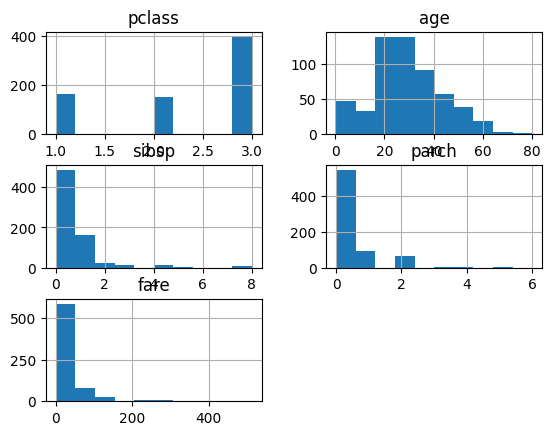

In [32]:
X_train.hist()

In [33]:
X_train.describe()

,pclass,age,sibsp,parch,fare
count,712.000000,572.000000,712.000000,712.000000,712.000000
mean,2.330056,29.498846,0.553371,0.379213,32.586276
std,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,30.500000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Modelo

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 5000)

log_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'male'

In [38]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

### Feature importance

In [39]:
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

In [40]:
stdevs = []
for i in X_train.columns:
    stdev = df[i].std()
    stdevs.append(stdev)

features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]
features['importance_standarized'] = features['importance'] / y_train.std()

features = features.sort_values('importance_standarized', ascending=True)
plt.barh(features.index, features.importance_standarized);

TypeError: could not convert string to float: 'male'

### Accuracy

In [41]:
X_test = X_test[X_train.columns].copy()

In [42]:
from sklearn.metrics import accuracy_score

acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3)
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)

ValueError: could not convert string to float: 'male'

¿Es bueno el modelo?

In [43]:
y_train.value_counts(True)

target
0    0.623596
1    0.376404
Name: proportion, dtype: float64

In [44]:
y_test.value_counts(True)

target
0    0.586592
1    0.413408
Name: proportion, dtype: float64

### Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_Pays', 'Pred_Default'],
                          index = ['True_Pays', 'True_Default'])

sns.heatmap(c_matrix_df, annot=True, fmt='g');

ValueError: could not convert string to float: 'male'

In [46]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df), annot=True, 
            fmt='.2%', cmap='Blues');

NameError: name 'c_matrix_df' is not defined

### Classification report

In [47]:
from sklearn.metrics import classification_report
from pprint import pprint

print(classification_report(y_test, log_reg.predict(X_test)))

ValueError: could not convert string to float: 'male'

### ROC Curve

In [48]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

AttributeError: 'LogisticRegression' object has no attribute 'classes_'